# Análisis de componentes principales (PCA)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


df = pd.read_csv(url, names=['lng sepalo','anch sepalo','lng petalo','anch petalo','especie'])

df.tail()

,lng sepalo,anch sepalo,lng petalo,anch petalo,especie
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [19]:
# Se divide la matriz del dataset en dos partes

X = df.iloc[:,0:4].values
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas
# Que son nuestras variables independientes, en caso de que la variable respuesta no esté
# en el dataframe, no es necesario hacer esta separación de columnas.

y = df.iloc[:,4].values
# El vector y contiene los valores de la 5ta columna (especie) para todas las filas

In [20]:
#Aplicamos una transformación de los datos para poder estandarizar los rangos de todas las variables

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [35]:
# Sci Kit learn realiza la descomposición de componentes principales con la siguiente clase
from sklearn.decomposition import PCA

# En este caso usaremos dos para poder graficar la información
componentes = 2 # Máximo el número de columnas (variables independientes) del dataset X_std

# Genera un objeto PCA e introduce el número de componentes que te interesa obtener
pca = PCA(n_components=componentes)

# Extrae los componentes principales con la función fit
pca.fit(X_std)

# Verifica tus componentes
print("Porcentaje de la varianza explicada por componente: \n", pca.explained_variance_ratio_)
print("Los componentes principales son: \n", pca.components_)

Porcentaje de la varianza explicada por componente: 
 [0.72770452 0.23030523]
Los componentes principales son: 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


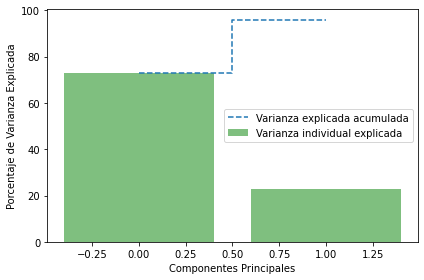

In [36]:
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada

plt.figure(figsize=(6, 4))

plt.bar(range(componentes), pca.explained_variance_ratio_*100, alpha=0.5, align='center',
        label='Varianza individual explicada', color='g')
plt.step(range(componentes), np.cumsum(pca.explained_variance_ratio_)*100, where='mid', linestyle='--', label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()

In [37]:
# Visualizamos los componentes principales
# (estas casillas sólo funcionan para los 2 primeros componentes principales)

#Generamos la matriz a partir de los pares autovalor-autovector
matrix_w = np.hstack((pca.components_[0].reshape(4,1),
                      pca.components_[1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)


Matriz W:
 [[ 0.52237162  0.37231836]
 [-0.26335492  0.92555649]
 [ 0.58125401  0.02109478]
 [ 0.56561105  0.06541577]]


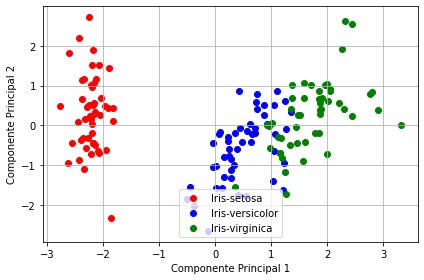

In [38]:
# Generar plot
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('red', 'blue', 'green')):
    plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.grid()
plt.show()